<a href="https://colab.research.google.com/github/ParthGohil21/SpaceShip-Titanic/blob/main/space_ship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and train dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)w
import matplotlib.pyplot as plt #plotting 
import seaborn as sns # data visualization.join(dirname, filename))


In [ ]:
train_data=pd.read_csv(r'/content/train.csv')
train=train_data.copy()

## Data Description 

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# EDA on train data

In [ ]:
# train data shap (it has 8693 raws and 14 columns)
train.shape

(8693, 14)

In [ ]:
# viewing first 20 data samples
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
# last 20 data samples 
train.tail(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8673,9256_01,Earth,True,G/1494/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Darley Franton,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8676,9261_01,Earth,True,G/1504/P,PSO J318.5-22,22.0,False,0.0,0.0,0.0,0.0,0.0,Therta Casentry,False
8677,9264_01,Europa,True,E/606/S,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Giedir Sionerorly,True
8678,9267_01,Europa,True,E/607/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Arraid Opshaft,True
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True


In [ ]:
# with desribe function you can get all statistical information about your numeric data 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [ ]:
# calling info() on dataset will provide all standard information about your dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- there are total 8693 raws and in info() where it is less than 8693 it means the difference is missing value for that particular feature in raws
- Dtype will give you data type of feature 


In [ ]:
# unique() will give you idea of how many unique values are in particular feature
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
# this will show you how many total missing values are in features 
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Data Visualization 

- We use seaborn here to plot Countplot and histogram here
- As name suggest countplot will plot count per category in feature when we are working with law cardinality features it is great to visualize them using countplot

- histogram is more used for looking at the distibution of feature

- Low cardinality features means feature which has few category like our target variable here which has only two category
- High cardinality feature means feature which has high number of category like our Name feature in this dataset which has 8473 different values

<AxesSubplot:xlabel='count', ylabel='Transported'>

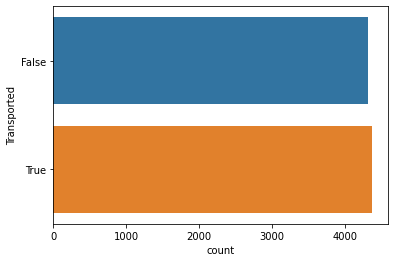

In [ ]:
# Transported is our target variable
sns.countplot(y=train.Transported)

- In this dataset our target variable is perfectly balanced but in most of datasets it is not balanced 
- We will work with more unbalanced dataset from tomorrow so don't worry about how to handle them now


<AxesSubplot:xlabel='count', ylabel='HomePlanet'>

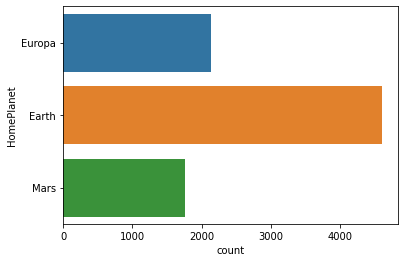

In [ ]:
sns.countplot(y=train.HomePlanet)

- Earthings rules the universe 😎


<AxesSubplot:xlabel='count', ylabel='CryoSleep'>

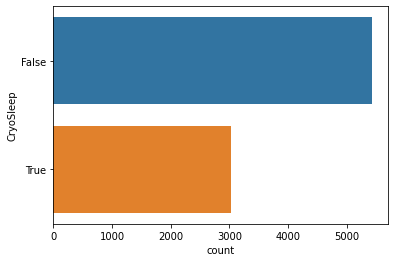

In [ ]:
sns.countplot(y=train.CryoSleep)

- There are almost 3000 people who like to be in animation while travelling
- Looks like many people like metaverse might just hit off 🙂


<AxesSubplot:xlabel='count', ylabel='Destination'>

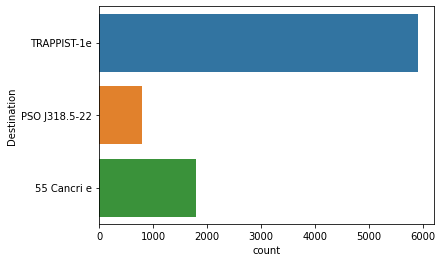

In [ ]:
sns.countplot(y=train.Destination)

- I have never been to these places man !! Looks like passwords though or Elon's son 😂


<AxesSubplot:xlabel='count', ylabel='VIP'>

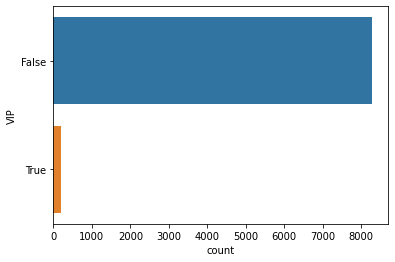

In [ ]:
sns.countplot(y=train.VIP)

- Very few VIP people as always 🥲

<AxesSubplot:xlabel='Age', ylabel='Count'>

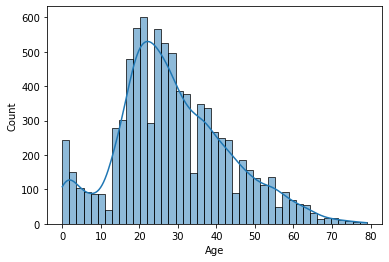

In [ ]:
sns.histplot(x=train.Age,kde=True)

- Looks like our distibution for Age class isn't bad 

<AxesSubplot:>

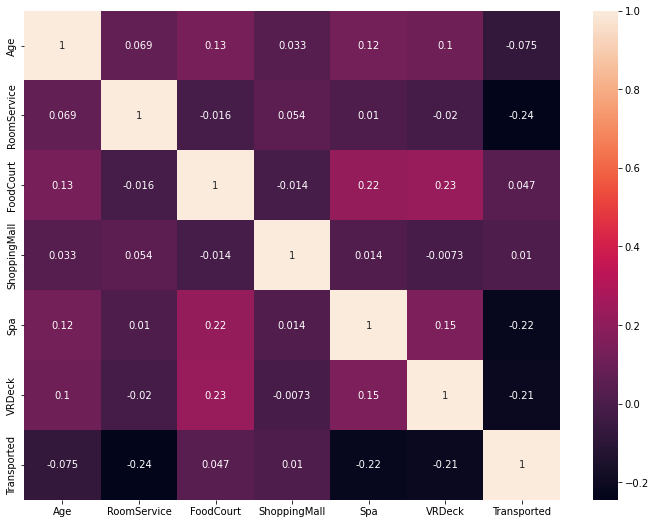

In [ ]:
# Now time to check correlation
corr=train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)

- Correlation == Relationship between different variables. Yepp that's what you need to know about correlation that it shows relation between variable. Generally it is between 1 to 1. 1 meaning high relation and -1 meaning negative realtion and 0 meaning no relation

### Time to look in Cabin

In [ ]:
train.Cabin.nunique()

6560

- Cabin is categorical feature with having 6560 different values in it. If we try to encode it with OneHotEncoding it will be disaster for our model since it will add 6560 columns in our dataset after encoding this columns

- This is what one hot encoding looks like
![image.png](attachment:c1af3905-9fc6-4631-ae57-4a375d61ddf0.png)

- For better understanding of Categorical Encoding I suggest go [here](https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial) It will only take 5-10 minutes to go through it.


In [ ]:
# let's fill our Cabin column with mode(most frequent) first to precess further.
train.Cabin=train.Cabin.fillna(train.Cabin.mode()[0])

In [ ]:
# Voila there are no missing values in Cabin any more 😁
train.Cabin.isna().sum()


0

In [ ]:
# let's look at Cabin column only now
train.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

- If you have read Data Description which I know you did you will know that ''Cabin Takes the form deck/num/side''

- So for example in B/0/P; B= deck, 0=num and P=side

In [ ]:
train['Cabin Side']=train.Cabin.map(lambda x: x[-1]) 
train['Cabin Side']


0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Cabin Side, Length: 8693, dtype: object

- Doing this will give us side of our cabin which can either be Port or Standbord, we will store it in new column Cabin Side

- If you don't know about map function go [here](https://www.geeksforgeeks.org/python-map-function/) and if don't know about lambda function go [here](https://www.w3schools.com/python/python_lambda.asp)

In [ ]:
train['Cabin Deck']=train.Cabin.map(lambda x: x[0])
train['Cabin Deck']


0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin Deck, Length: 8693, dtype: object

- Doing this will give us deck of our cabin which we will store in new column Cabin Deck

In [ ]:
train['Cabin Num']=train.Cabin.map(lambda x: x[2])
train['Cabin Num']

0       0
1       0
2       0
3       0
4       1
       ..
8688    9
8689    1
8690    1
8691    6
8692    6
Name: Cabin Num, Length: 8693, dtype: object

- This will give us number of our cabin which we will store in new column Cabin Num

- Now let's drop some columns which we don't need at all, we drop them because they can't help us in making predictions at all
- We don't need Name or Id because they are useless when we want to find out if person will survive or not.
- We have made three new columns from cabin column so we don't need it anymore either
- We don't also need Destination for predictions because no mattere where you are going, ship crash can surely kill you 🙂

In [ ]:
cols_to_drop=['Name','PassengerId','Destination','Cabin']

In [ ]:
# drop columns using drop() axis=1 means column and axis=0 means raw
train=train.drop(cols_to_drop,axis=1)

In [ ]:
train.head(10)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Side,Cabin Deck,Cabin Num
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1
5,Earth,False,44.0,False,0.0,483.0,0.0,291.0,0.0,True,P,F,0
6,Earth,False,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,S,F,2
7,Earth,True,28.0,False,0.0,0.0,0.0,0.0,NaN,True,S,G,0
8,Earth,False,35.0,False,0.0,785.0,17.0,216.0,0.0,True,S,F,3
9,Europa,True,14.0,False,0.0,0.0,0.0,0.0,0.0,True,P,B,1


In [ ]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin Side        0
Cabin Deck        0
Cabin Num         0
dtype: int64

In [ ]:
train.shape

(8693, 13)

- we dropped three columns and aslo added three new columns so shape will stay the same

- Now let's divide our dataset into independent and dependent 

In [ ]:
X=train.drop('Transported',axis=1) #Independent 
Y=train.Transported #Dependent

- Y has two values False and True so we will convert them into 0 and 1 using astype() function. it will convert false into 0 and True into 1

- we need to do so that our model can perform operations, We will convert it back into False and True when submitting predictions 

In [ ]:
Y=Y.astype('int')

## train test split

In [ ]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y=train_test_split(X,Y,random_state=0,test_size=0.2)

- We will split our training data into two part 
1. train data and 
2. validation data


- We do so to check our model performance after it has trained on our training data. We don't dare touch our validation data for training purpose and once our model is trained we use validation data to check how good it is and if there can be further improvements in it.

In [ ]:
# We will get numerica and categorical columns name from doing this
obj_cols=[col for col in train_X.columns if train[col].dtypes=='object'] # Categorical columns
num_cols=[col for col in train_X.columns if train[col].dtypes!='object'] #Numerica columns

# Pipeline and ColumnTransformer

- If you don't know about feature scaling go [here](https://prthgo.medium.com/feature-transformation-3306c7ac9dd5) it's blog written poorly by me 😂. 
- Pipeline will put multiple steps into one object so we can perform them easily it will keep our code clean and simple to understand 
- ColumnTransformer will perform preprocessing on our columns 

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# This will do all preprocessing on numerical columns
# First we will impute missing values in columns with the mean of column then we will scale our numerical
#  features with StandardScaler.
num_preprocess=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaling',StandardScaler())
])


# This will perform preprocessing on our Categorical features
# First we will impute missing values with most_frequnt values in that column and then we will one hot encode them
obj_preprocess=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(handle_unknown='ignore'))
    
])


# Now we will use ColumnTransformer to put above to steps in one object to perform all preprocessing at once
preprocessor= ColumnTransformer(transformers=[
    ('num', num_preprocess,num_cols),
    ('obj', obj_preprocess,obj_cols)
])

## model building and evaluation 

In [ ]:
# First we will use LogisticRegression model
from sklearn.linear_model import LogisticRegression

# not passing any parametrs, our model will accept default parameters
lr_model=LogisticRegression(random_state=0)


In [ ]:
#  Now we will create pipeline using our lr_model with preprocessing

lr_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',lr_model)
])

In [ ]:
# now we will fit our model on training data, fitting model will train our model generally 
lr_pipe.fit(train_X,train_y)

# Now we will predict on our validation data using our trained model
lr_pred=lr_pipe.predict(val_X)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,f1_score


# Now we will check accuracy of our model with some matrices, 
# don't worry if you don't know about them right now, just look at the score
print(f'Accuracy of Logistic Regression Model: {accuracy_score(val_y,lr_pred)}')
print(f'F1 Score of Logistic Regression Model: {f1_score(val_y,lr_pred)}')
print('Confusion Matrix of Logistic Regression Model')
confusion_matrix(val_y,lr_pred)

Accuracy of Logistic Regression Model: 0.7889591719378953
F1 Score of Logistic Regression Model: 0.7948574622694242
Confusion Matrix of Logistic Regression Model


array([[661, 202],
       [165, 711]])

In [ ]:
#  Now we will use randomforest model and perform above steps again
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=0)


In [ ]:
rf_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',rf_model)
])

In [ ]:
rf_pipe.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('obj',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                         

In [ ]:
rf_pred=rf_pipe.predict(val_X)

In [ ]:
print(f'Accuracy of Random Forest Model: {accuracy_score(val_y,rf_pred)}')
print(f'F1 Score of Random Forest Model: {f1_score(val_y,rf_pred)}')
print('Confusion Matrix of Random Forest Model')
confusion_matrix(val_y,rf_pred)

Accuracy of Random Forest Model: 0.7843588269120184
F1 Score of Random Forest Model: 0.7771836007130125
Confusion Matrix of Random Forest Model


array([[710, 153],
       [222, 654]])

In [ ]:
# Now it is time for my favorite model LightGBM

from lightgbm import LGBMClassifier
# we will pass some parameters here
lgb_model=LGBMClassifier(n_estimators=100,boosting_type='gbdt',random_state=0,max_depth=20,
                         num_leaves=40,min_child_samples=2,learning_rate=.1)
                        


In [ ]:
lgb_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',lgb_model)
])

In [ ]:
lgb_pipe.fit(train_X,train_y)

lgb_pred=lgb_pipe.predict(val_X)

In [ ]:
print(f'Accuracy of Light GBM Model: {accuracy_score(val_y,lgb_pred)}')
print(f'F1 Score of Light GBM Model: {f1_score(val_y,lgb_pred)}')
print('Confusion Matrix of Light GBM Model')
confusion_matrix(val_y,lgb_pred)

Accuracy of Light GBM Model: 0.8125359401955147
F1 Score of Light GBM Model: 0.8178770949720671
Confusion Matrix of Light GBM Model


array([[681, 182],
       [144, 732]])

# model building on test data

- This are same steps as we did on training data so i will not address much untill it's something new


In [ ]:
test_data=pd.read_csv(r'/content/test.csv')
test=test_data.copy()

In [ ]:
test.shape

(4277, 13)

In [ ]:
test.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


In [ ]:
test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [ ]:
test.Cabin=test.Cabin.fillna(test.Cabin.mode()[0])


In [ ]:
test['Cabin Side']=test.Cabin.map(lambda x: x[-1]) 
test['Cabin Side']


0       S
1       S
2       S
3       S
4       S
       ..
4272    S
4273    P
4274    P
4275    P
4276    S
Name: Cabin Side, Length: 4277, dtype: object

In [ ]:
test['Cabin Deck']=test.Cabin.map(lambda x: x[0])
test['Cabin Deck']

0       G
1       F
2       C
3       C
4       F
       ..
4272    G
4273    G
4274    D
4275    D
4276    G
Name: Cabin Deck, Length: 4277, dtype: object

In [ ]:
test['Cabin Num']=test.Cabin.map(lambda x: x[2])
test['Cabin Num']

0       3
1       4
2       0
3       1
4       5
       ..
4272    1
4273    1
4274    2
4275    2
4276    1
Name: Cabin Num, Length: 4277, dtype: object

In [ ]:
test=test.drop(cols_to_drop,axis=1)

In [ ]:
test.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin Side,Cabin Deck,Cabin Num
0,Earth,True,27.0,False,0.0,0.0,0.0,0.0,0.0,S,G,3
1,Earth,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,S,F,4
2,Europa,True,31.0,False,0.0,0.0,0.0,0.0,0.0,S,C,0
3,Europa,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,S,C,1
4,Earth,False,20.0,False,10.0,0.0,635.0,0.0,0.0,S,F,5


#### Now we will train again on our whole traing data and make predictions on our test data for submission for our competition

In [ ]:
lgb_pipe.fit(X,Y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('obj',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                         

In [ ]:
test_pred=lgb_pipe.predict(test) 

In [ ]:
test_pred.shape

(4277,)


# submission

In [ ]:
# We will make a new  dataframe with passengerid and our predictions to submit
submission=pd.DataFrame({'PassengerId':test_data.PassengerId, 'Transported':test_pred})
submission

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


- Since It was False and True in our target variable we will replace 0 with False and 1 with True

In [ ]:
submission.Transported=submission.Transported.replace({0:'False', 1:'True'})

In [ ]:
# This is what our final prediction dataframe looks like
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# converting it into csv file fore submission
submission.to_csv('submission.csv',index=False)